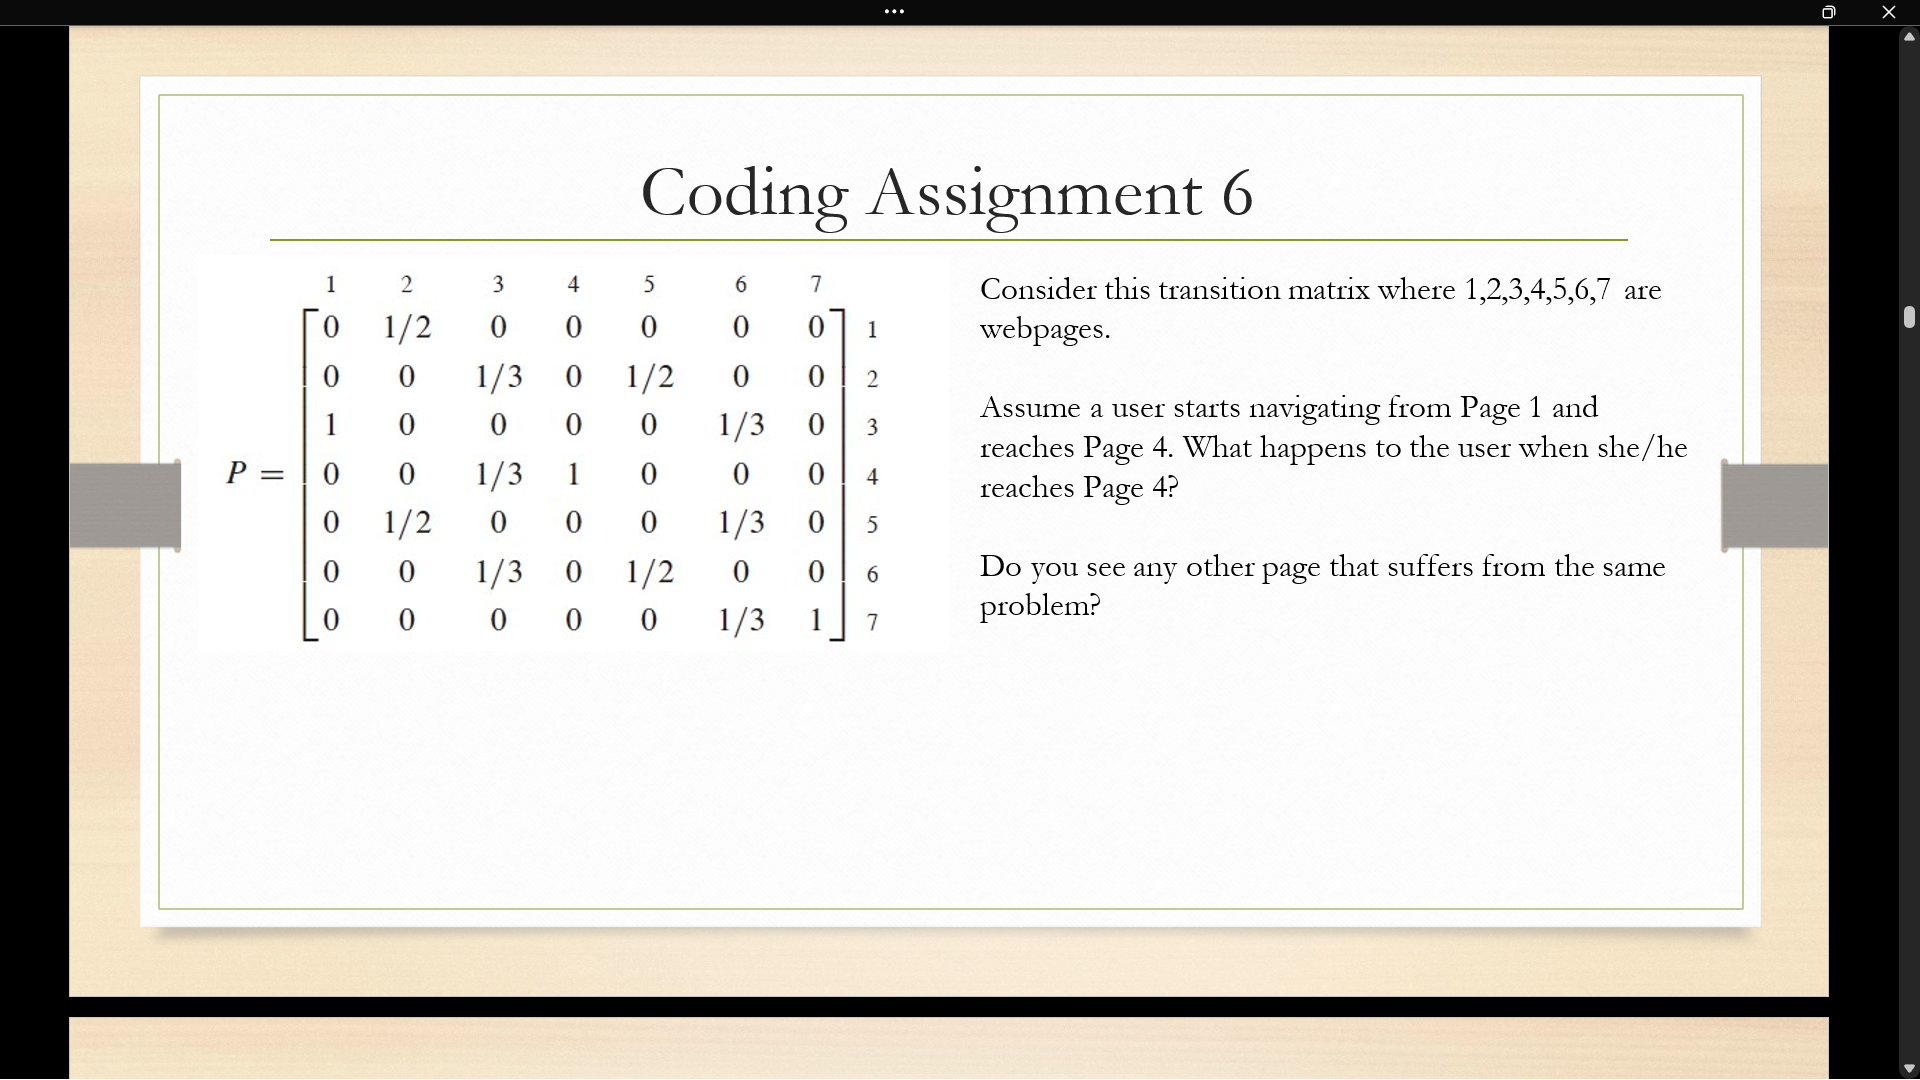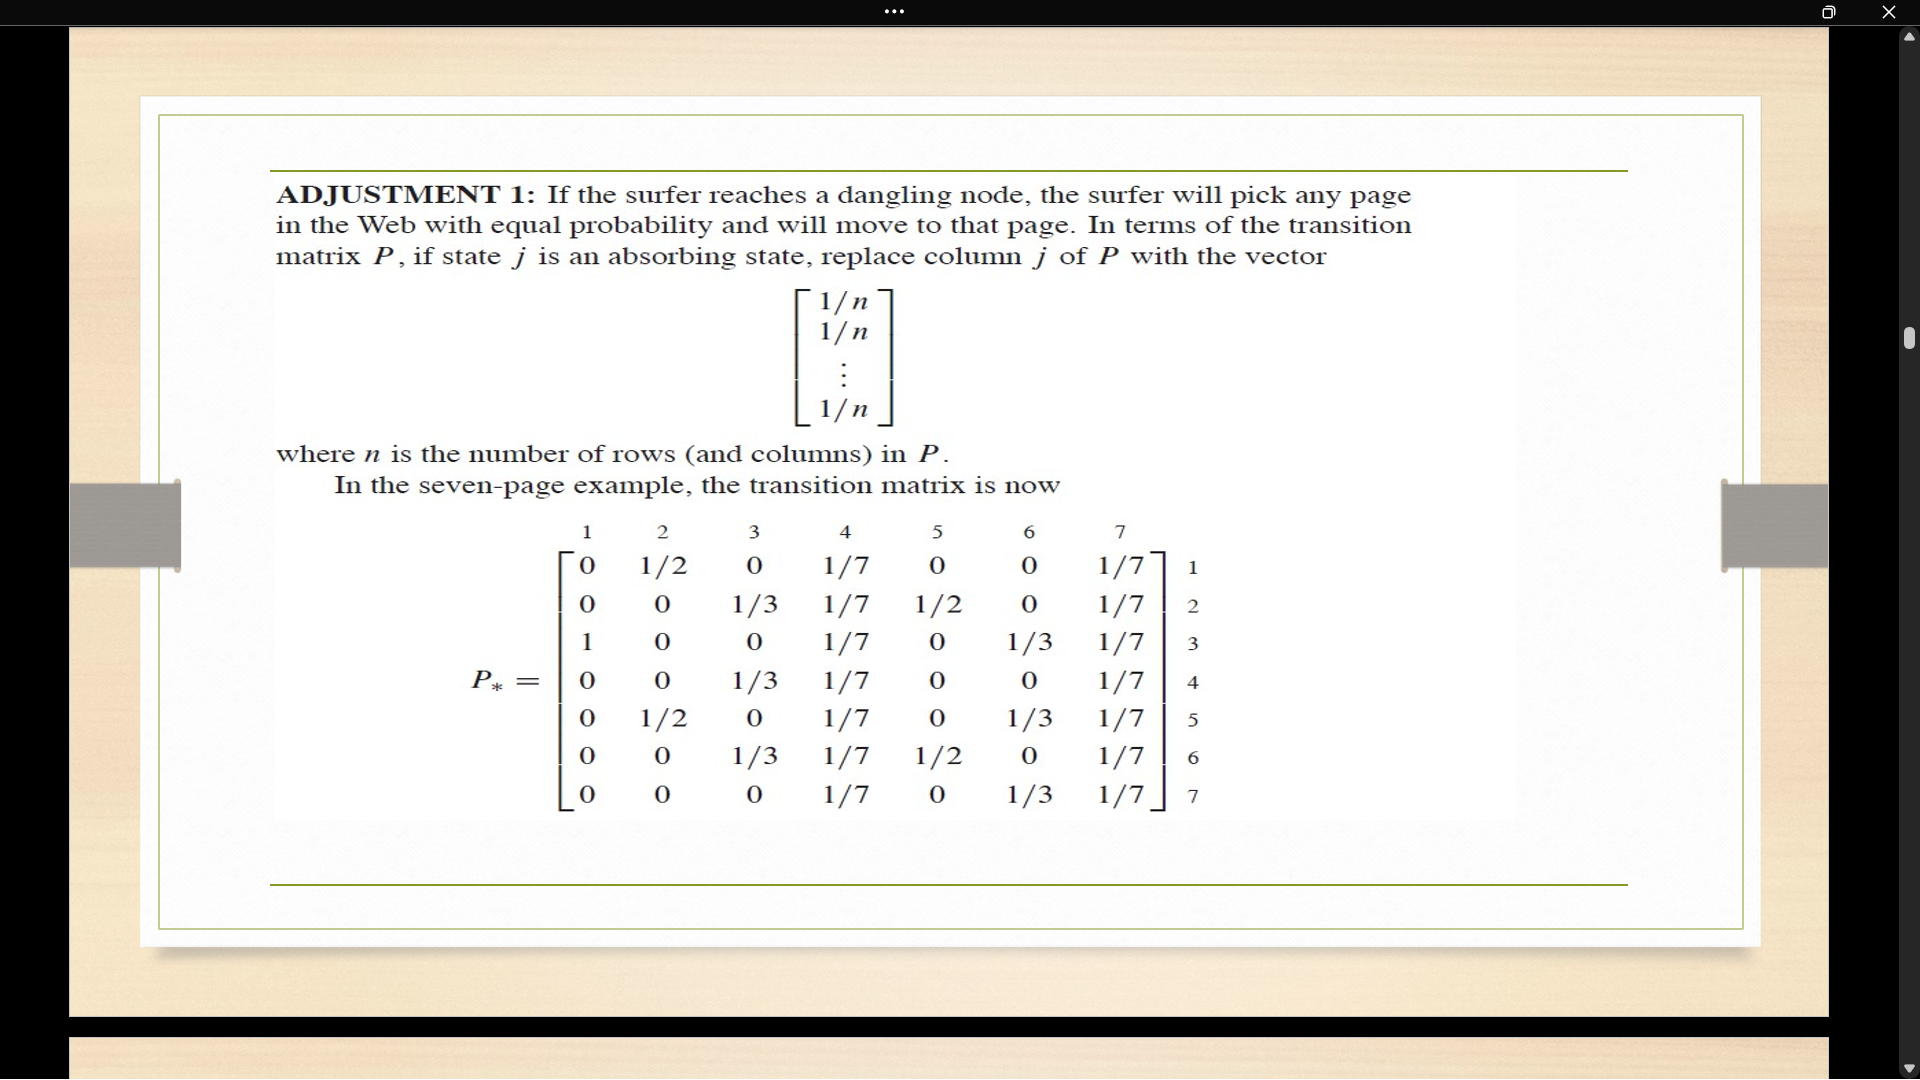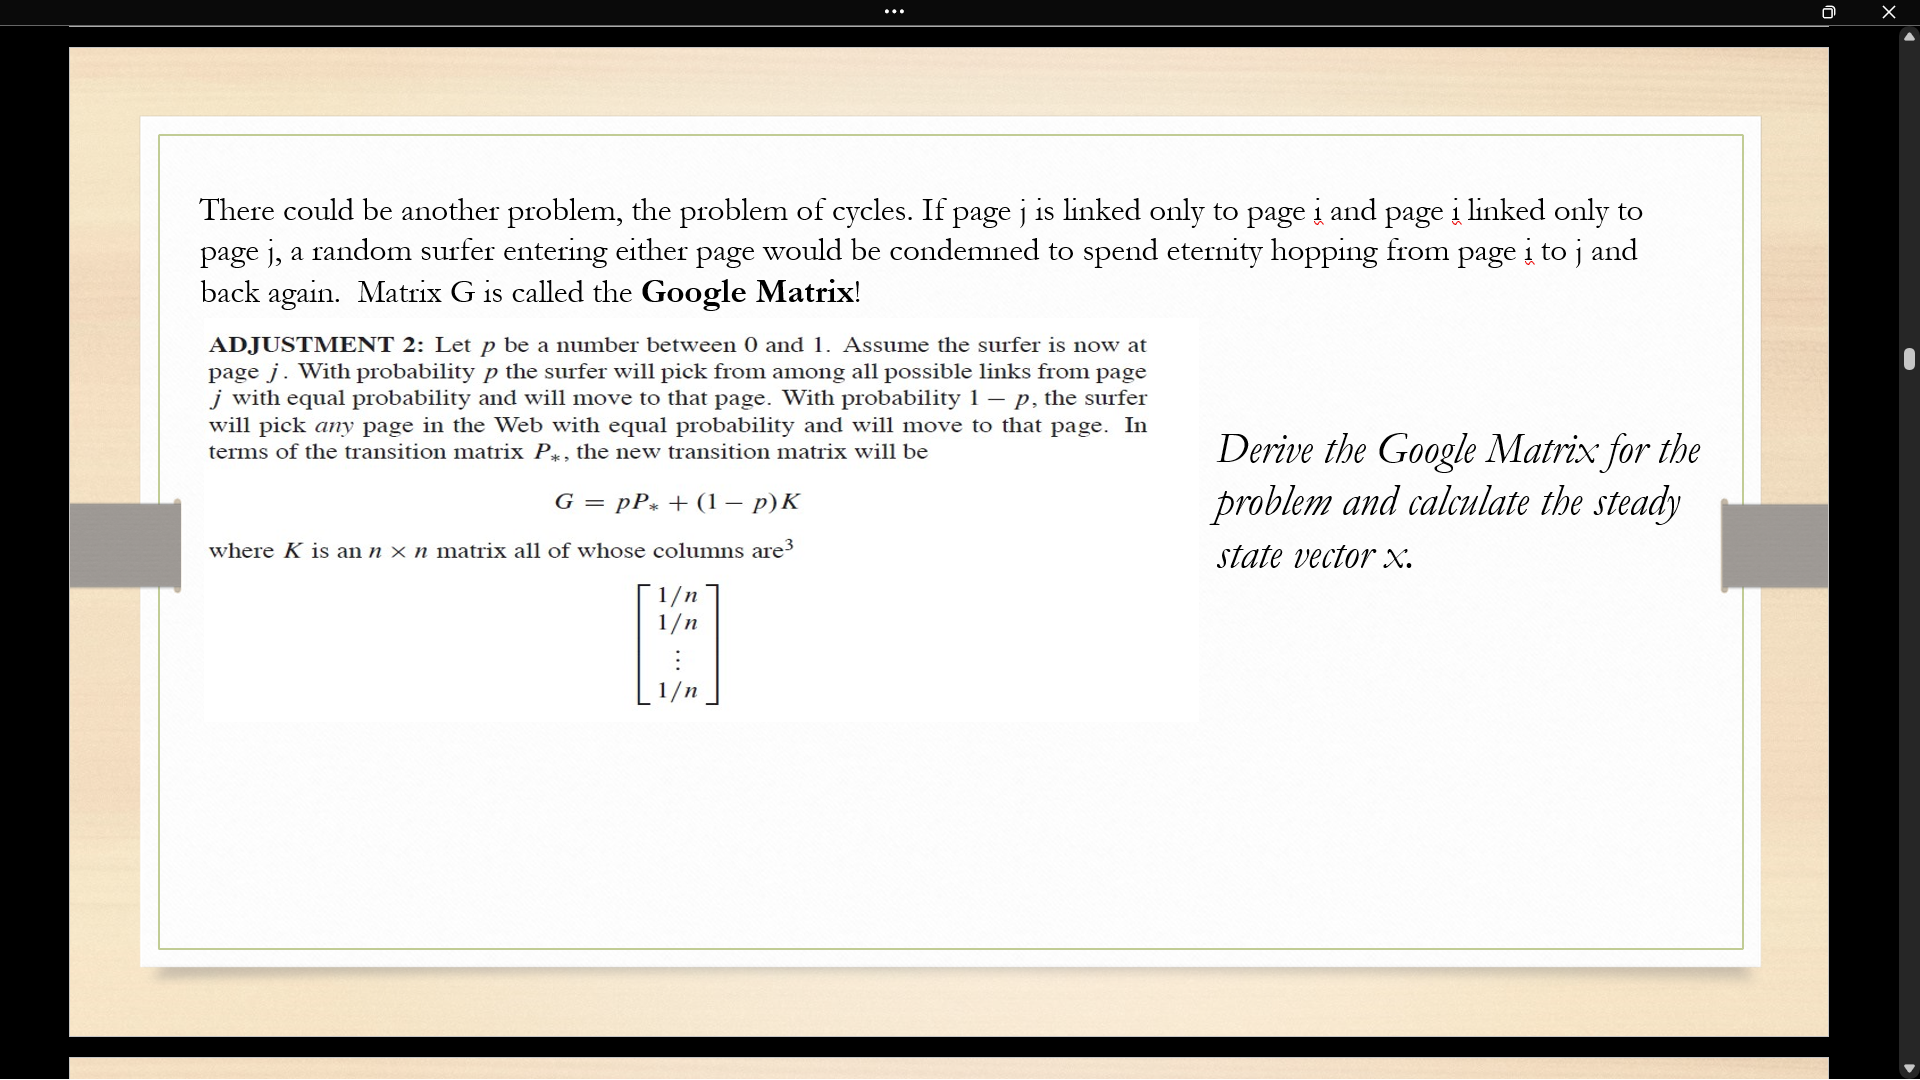

#### Solution

    - When a user starts navigating from page 1 and reaches page 4,the user won't be able to navigate to any other pages as there are no out going edges from page 4.Such nodes/pages are called as Dangling nodes.
    - Dangling nodes are nodes in the graph that have no outgoing edges.
    - Similar to page 1,page 7 also suffers the same problem.

**Adjustment 1:** In adjustment 1,the problem of dangling nodes is addressed.

**Adjustment 2:** In adjustment 2,the problem of cyclic links is addressed.

#### 1.Import the necessary libraries

In [1]:
import numpy as np

#### 2.Initialize the transition matrix

In [2]:
# Define the transition matrix(P)
P = np.array([[0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [1, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 1, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 1]])

print('The given transition matrix is \n',P)

The given transition matrix is 
 [[0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [1.         0.         0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


#### 3.Handle the dangling nodes

In [3]:
dangling_nodes_index = np.where(np.diag(P)==1)[0] 
n = len(P)
P[:,dangling_nodes_index] = 1/n
print('The transition matrix after handling the dangling nodes is \n',P)

The transition matrix after handling the dangling nodes is 
 [[0.         0.5        0.         0.14285714 0.         0.
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [1.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.         0.
  0.14285714]
 [0.         0.5        0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [0.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]]


#### 4.Handle the cyclic links

In [4]:
# Define the damping_factor(p)
p = 0.85

#### 5.Construct the Google Matrix

In [5]:
# Define the matrix K 
K = np.ones(np.shape(P))/n

# Define the Google matrix G
G = p*P + (1-p)*K
print('The google matrix is given by \n',G)

The google matrix is given by 
 [[0.02142857 0.44642857 0.02142857 0.14285714 0.02142857 0.02142857
  0.14285714]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.44642857 0.02142857
  0.14285714]
 [0.87142857 0.02142857 0.02142857 0.14285714 0.02142857 0.3047619
  0.14285714]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.02142857 0.02142857
  0.14285714]
 [0.02142857 0.44642857 0.02142857 0.14285714 0.02142857 0.3047619
  0.14285714]
 [0.02142857 0.02142857 0.3047619  0.14285714 0.44642857 0.02142857
  0.14285714]
 [0.02142857 0.02142857 0.02142857 0.14285714 0.02142857 0.3047619
  0.14285714]]


#### 6.Calculate the steady state vector

In [6]:
# Calculate the eigen values of G
eigenvalues,eigenvectors = np.linalg.eig(G)
print('The eigen values of G are\n',eigenvalues)

The eigen values of G are
 [ 1.00000000e+00+0.00000000e+00j -4.00741066e-01+0.00000000e+00j
 -1.95839562e-01+1.32079202e-01j -1.95839562e-01-1.32079202e-01j
  1.85277332e-01+0.00000000e+00j  4.37456180e-16+3.74427349e-09j
  4.37456180e-16-3.74427349e-09j]


In [7]:
# Find the real part of the eigen values of G
real_eigenvalues = eigenvalues.real
print('The real part of eigen values of G are\n',real_eigenvalues)

The real part of eigen values of G are
 [ 1.00000000e+00 -4.00741066e-01 -1.95839562e-01 -1.95839562e-01
  1.85277332e-01  4.37456180e-16  4.37456180e-16]


In [8]:
# Find the eigen vector corresponding to eigen value 1 
index = np.where(np.isclose(real_eigenvalues,1))
eigen_vector = eigenvectors[:,index].real
print('The eigen vector corresponding to eigen value 1 is \n',eigen_vector)

The eigen vector corresponding to eigen value 1 is 
 [[[0.29813055]]

 [[0.43213841]]

 [[0.49032191]]

 [[0.25339626]]

 [[0.42056977]]

 [[0.43213841]]

 [[0.23691094]]]


In [9]:
# Normalize the extracted eigen vector
normalized_vector = eigen_vector/np.sum(eigen_vector)
print('After normalization the eigen vector is\n',normalized_vector)

After normalization the eigen vector is
 [[[0.11629342]]

 [[0.16856661]]

 [[0.19126256]]

 [[0.09884367]]

 [[0.16405396]]

 [[0.16856661]]

 [[0.09241315]]]


#### 7.Display the steady state vector

In [10]:
print('The steady state vector is x ')
for i in normalized_vector:
    print(i)

The steady state vector is x 
[[0.11629342]]
[[0.16856661]]
[[0.19126256]]
[[0.09884367]]
[[0.16405396]]
[[0.16856661]]
[[0.09241315]]
